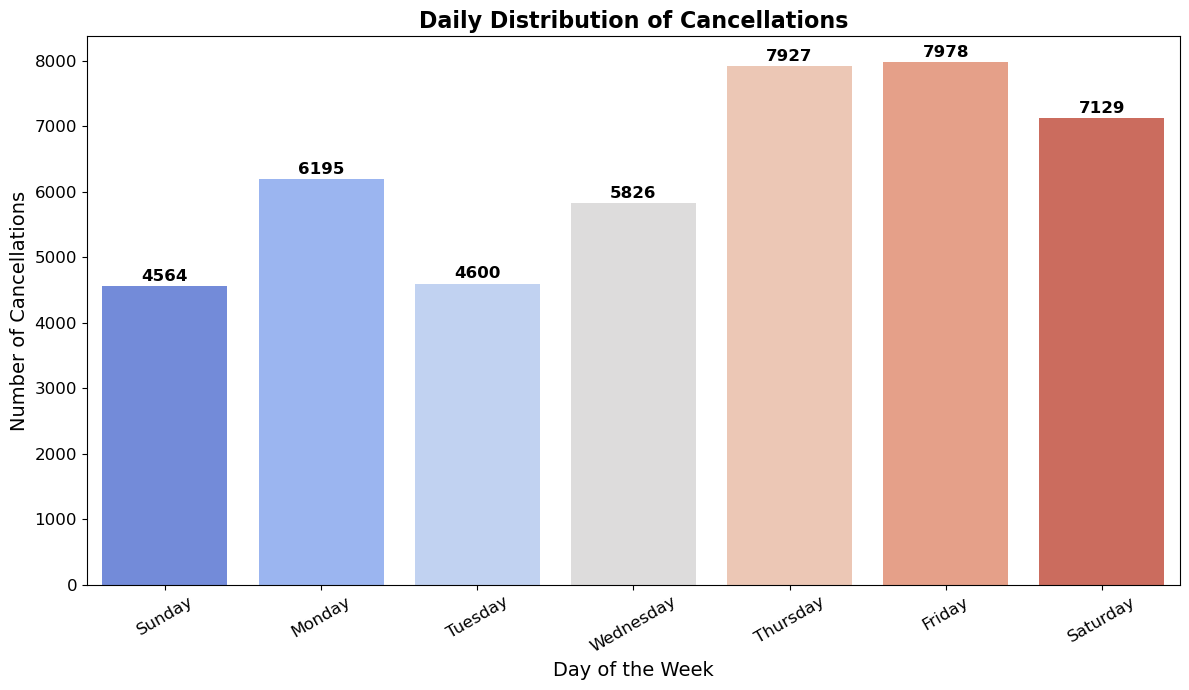

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load file
df = pd.read_csv(r"C:\Users\annie\Downloads\reservationsN.csv")

# Filter only canceled bookings
canceled = df[df['cancel'] == 'yes'].copy()

# Convert month name (M) to month number
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
canceled['month_num'] = canceled['M'].map(month_mapping)

# Create date column
canceled['date'] = pd.to_datetime(dict(year=canceled['Y'], month=canceled['month_num'], day=canceled['DOM']))

# Add day of week column
canceled['day_of_week'] = canceled['date'].dt.day_name()

# Count cancellations per day of week, ordered Sunday to Saturday
counts = canceled['day_of_week'].value_counts().reindex(
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=counts.index, y=counts.values, palette="coolwarm")

# Titles and labels in English
plt.title("Daily Distribution of Cancellations", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Number of Cancellations", fontsize=14)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for i, val in enumerate(counts.values):
    ax.text(i, val + max(counts.values)*0.01, str(val), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()